# Evaluation Metrics for Classifiers

There are two reasons why you might want to evaluate the performance of a classifier.  One is that you need to characterize performance as part of optimizing model parameters (also known as "training" the model).  The other is that you need to guage the performance of a classifier in terms of the objectives of the problem you're trying to solve.  

## Videos on classifier metrics
https://www.youtube.com/watch?v=_-PwDwaQQpY - ROC  
https://www.youtube.com/watch?v=OAl6eAyP-yo  - AUC  
https://www.youtube.com/watch?v=zrr4eu29uww - Confusion matrix 1/2  
https://www.youtube.com/watch?v=p1lUKcbMZtA - Confusion matrix 2/2  


## Q
Would the same method of performance evaluation work for both of these objectives?  

## Goals

* Given two ROC curves, pick the best curve/threshold for the problem at hand
* When would you use F_beta vs. AUC
* State one reason why the Youden index is useful and one reason it can be misleading
* __Exercise (next week):__ Construct a Profit curve to evaluate the precision/recall trade-off

## Review 

A classification problem is when we're trying to predict a discrete (categorical) outcome. We'll start with binary classification (i.e., yes/no questions).

Here are some example questions:

* Does a patient have cancer?
* Will a team win the next game?
* Will the customer buy my product?
* Will I get the loan?

In binary classification, we assign labels of 0 and 1 to our data.

### Logistic Regression

Let's start by looking at an example. We're going to be using some NFL data. The x axis is the number of touchdowns scored by team over a season and the y axis is whether they lost or won the game indicated by a value of 0 or 1 respectively.

![NFL data](images/nfl.png)

So, how do we predict whether we have a win or a loss if we are given a score? Note that we are going to be predicting values between 0 and 1. Close to 0 means we're sure it's in class 0, close to 1 means we're sure it's in class 1, and closer to 0.5 means we don't know.

If we use linear regression, we will certainly do better than randomly guessing, but it doesn't accurately represent the data:

![NFL linear regression](images/linefit.png)

So clearly a line is not the best way to model this data. So we need to find a better curve.

## Measuring success 

So how do we measure how well our model does? Just like with regression, we need to split the data in a training set and a test set and measure our success based on how well it does on the test set.

### Accuracy
The simplest measure is **accuracy**. This is the number of correct predictions over the total number of predictions. It's the percent you predicted correctly. In `sklearn`, this is what the `score` method calculates.

### Shortcomings of Accuracy
Accuracy is often a good first glance measure, but it has many shortcomings. If the classes are unbalanced, accuracy will not measure how well you did at predicting. Say you are trying to predict whether or not an email is spam. Only 2% of emails are in fact spam emails. You could get 98% accuracy by always predicting not spam. This is a great accuracy but a horrible model!

### Confusion Matrix
We can get a better picture our model but looking at the confusion matrix. We get the following four metrics:

* **True Positives (TP)**: Correct positive predictions
* **False Positives (FP)**: Incorrect positive predictions (false alarm)
* **True Negatives (TN)**: Correct negative predictions
* **False Negatives (FN)**: Incorrect negative predictions (a miss)

|            | Predicted Yes  | Predicted No   |
| ---------- | -------------- | -------------- |
| Actual Yes | True positive  | False negative |
| Actual No  | False positive | True negative  |

With logistic regression, we can visualize it as follows:

![logistic confusion matrix](images/logistic.png)

### Precision, Recall and F1

![](http://i.stack.imgur.com/ysM0Z.png)
Instead of accuracy, there are some other scores we can calculate:

* **Precision**: A measure of how good your positive predictions are
    ```
    Precison = TP / (TP + FP)
             = TP / (predicted yes)
    ```
* **Recall**: A measure of how well you predict positive cases. Aka *sensitivity*.
    ```
    Recall = TP / (TP + FN) 
           = TP / (actual yes)
    ```
* **F1 Score**: The harmonic mean of Precision and Recall
    ```
    F1 = 2 / (1/Precision + 1/Recall)
       = 2 * Precision * Recall / (Precision + Recall)
       = 2TP / (2TP + FN + FP)
    ```

Accuracy can also be written in this notation:
```
Accuracy = (TP + TN) / (TP + FP + TN + FN)
```
![](http://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

## Q
1.  What tools do you have at your disposal to change TP, FP, TN and FN?  
2.  Some of you used linear regression to predict the 2-4 labels on the breast cancer data set.  What could you do with the output from that model to get your classifier to correctly classify every positive exaple?
3.  In what ways would performance suffer?

## Example 1.  - Calculating confusion matrix quantities
Suppose that you're using linear regression to predict 0-1 labels.  You train your model and on the test data you get the following results.  Calculate the  


In [12]:
# Here are the results in list form, so it's easier to do some calculations
labels = [0,0,0,0,0,1,1,1,1,1]
predictions = [-0.8, -0.4, 0.0, 0.4, 0.8, 0.2, 0.6, 1.0, 1.4, 1.8]
threshold = 0.4

#calculate #'s for TP, FP, TN, FN
lp = zip(labels, predictions)
TP = sum([1 for (l,p) in lp if l>0 and p>threshold])
FN = sum([1 for (l,p) in lp if l>0 and p<=threshold])
TN = sum([1 for (l,p) in lp if l<=0 and p<=threshold])
FP = sum([1 for (l,p) in lp if l<=0 and p>threshold])
print(TP + FN + TN + FP)
print(TP, FN, FP, TN)

print(10*FN + FP)

10
(4, 1, 1, 4)
11


## Example 2. - Suppose some mistakes are more expensive than others
Now suppose that the cost of a false positive is 1 and the cost of a false negative is 10, while true positive and false positive cost zero.  How much does your predictor cost with a threshold value of 0.5?  Generate costs for threshold values of 0.0, 0.25, 0.5, 0.75 and 1.0.  Which one yields the minimum cost?  Explain any shift in the threshold from 0.5.  


## Lab Exercise 1.  
Use one of the KNN model that you trained on breast cancer data.  That model is trying to predict the numbers 2 or 4 corresponding to no cancer or cancer.  Suppose you used the number 3.0 to form no/yes prediction based on your numerical prediction.  
1.  Use a threshold value of 3.0 on the breast cancer knn model you built.  Compare the predictions to the actual labels and generate 2x2 matrix of predictions versus actual - TP, FP, TN, FN.  
2.  Suppose there's a cost of 200k for false negative and a cost of 2k for false positive.  Calculate costs associated with your classifier and experiment with some values to get a feel for the best threshold value.  

### ROC Curves 

One of the best ways to evaluate how a classifier performs is an ROC curve. (http://en.wikipedia.org/wiki/Receiver_operating_characteristic) 

![](images/roc_curve.png)

ROC curve plots true positive rate (TPR) versus false positive rate (FPR).  TPR and FPR are defined in terms of quantities that you can read out of the confusion matrix.  Here are the definitions.   to plot it.


Recall that the true positive **rate** is

```
 number of true positives     number correctly predicted positive
-------------------------- = -------------------------------------
 number of positive cases           number of positive cases
```

and the false positive **rate** is

```
 number of false positives     number incorrectly predicted positive
--------------------------- = ---------------------------------------
  number of negative cases           number of negative cases
```


### Example 3.  
1. Write an ROC curve function to compute several points on the ROC curve for the toy problem above. Then plot the result (TPR versus FPR).  
2.  What happens if you choose a threshold value and generate hard 0-1 labels before calculating the ROC curve?


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.4, 0.2, 0.2, 0.0, 0.0] [1.0, 1.0, 0.8, 0.8, 0.6, 0.6, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


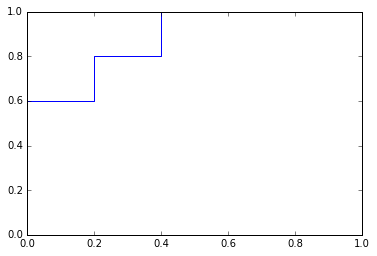

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Here are the results in list form, so it's easier to do some calculations
labels = [0,0,0,0,0,1,1,1,1,1]
predictions = [-0.8, -0.4, 0.0, 0.4, 0.8, 0.2, 0.6, 1.0, 1.4, 1.8]

tpr = []; fpr= []
for th in np.linspace(-1, 2, 20):
    threshold = th
    
    #calculate #'s for TP, FP, TN, FN
    lp = zip(labels, predictions)
    TP = sum([1 for (l,p) in lp if l>0 and p>threshold])
    FN = sum([1 for (l,p) in lp if l>0 and p<=threshold])
    TN = sum([1 for (l,p) in lp if l<=0 and p<=threshold])
    FP = sum([1 for (l,p) in lp if l<=0 and p>threshold])
    tpr.append(TP/5.0)
    fpr.append(FP/5.0)
    
print tpr, fpr
plt.plot(fpr, tpr)

## Thought Lab 
When you use KNN as your prediction algorithm you have two choices on this binary classification problem.  You can use regression version of KNN or classification version of KNN.  
1.  What happens if you take as output from KNN classifier, the majority class?  What your alternative?
2.  What is the difference in the way the labels are calculated?
2.  What is the difference in the ROC curve?

## Lab Exercise 2.  
1.  Plot a ROC curve for the breast cancer data using whatever predictions are handy for you.  


### Youden Index

Youden's Index (sometimes called J statistic) is similar to the F1 score in that it is a single number that describes the performance of a classifier.

$$J = Sensitivity + Specificity - 1$$

$$where$$

$$Sensitivity = \frac{TP}{TP + FN}$$

$$Specificity = \frac{TN}{TN + FP}$$

![](http://i.stack.imgur.com/ysM0Z.png)

The J statistic ranges from 0 to 1:
* 0 indicating that the classifier does no better than random
* 1 indicating that the test performed perfectly

It can be thought of as an improvement on the F1 score since it takes into account all of the cells in a confusion matrix.  It can also be used to find the optimal threshold for a given ROC curve.